# Financial Forecasting
**Using daily stock data from y-finance from 2010 to 2023 for JPMorgan Chase & Co** *(Ticker:JPM)*


In [1]:
# If necessary
!pip install yfinance

In [2]:
# Importing necessary packages
import yfinance as yf
import pandas as pd

# Plotting libraries
import seaborn as sns
from matplotlib import pyplot as plt

ticker_symbol = 'JPM'

# Pulling data from yahoo finance
stock_data = yf.Ticker(ticker_symbol)

# Specify period
historical_data = stock_data.history(start='2010-01-01', end='2023-01-01')

# Feature selection
dataset = historical_data[['Open', 'High', 'Low', 'Close']]

# Creating dataframe
df = pd.DataFrame(dataset)

# Drop rows with NaN values, most likely none
df = df.dropna()

# Probably delete not necessary ask professor
"""
# Calculate MACD
# Short-term EMA (12 days)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
# Long-term EMA (26 days)
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
# MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
# Signal line (9 days EMA of MACD)
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
"""
df.head(20)

,Open,High,Low,Close
Date,,,,
2010-01-04 00:00:00-05:00,28.435307,29.251828,28.353653,29.156565
2010-01-05 00:00:00-05:00,29.115721,29.830175,29.108915,29.721306
2010-01-06 00:00:00-05:00,29.564817,30.000294,29.469557,29.884619
2010-01-07 00:00:00-05:00,29.796169,30.701144,29.673691,30.476603
2010-01-08 00:00:00-05:00,30.190815,30.415360,29.993492,30.401751
2010-01-11 00:00:00-05:00,30.701148,30.748778,30.149999,30.299692
2010-01-12 00:00:00-05:00,29.932248,30.041117,29.217791,29.592031
2010-01-13 00:00:00-05:00,29.632867,30.299691,29.170172,30.109171
2010-01-14 00:00:00-05:00,30.075160,30.476616,30.007115,30.408571


# Exploratory Data Analysis

Size of our dataset

In [ ]:
df.shape

(3272, 4)

Descriptive statistics

In [ ]:
mean = round(df.mean(), 2)
median = round(df.median(), 2)
variance = round(df.var(), 2)
std_dev = round(df.std(), 2)

summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std_dev
})

summary_df.head()

,Mean,Median,Variance,Standard Deviation
Open,68.14,52.59,1386.63,37.24
High,68.80,52.85,1413.05,37.59
Low,67.47,52.20,1360.12,36.88
Close,68.14,52.61,1385.63,37.22


Visualizations

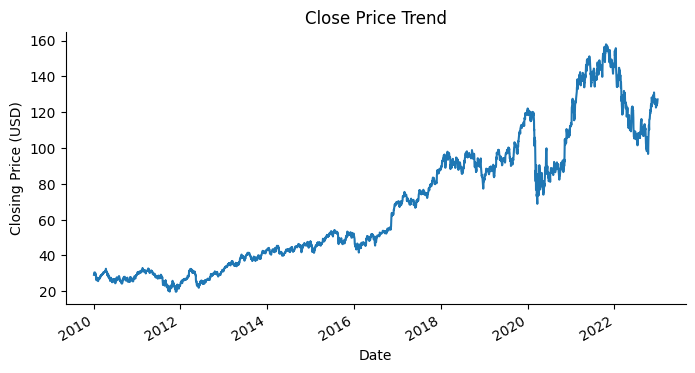

In [ ]:
df['Close'].plot(kind='line', figsize=(8, 4), title='Close Price Trend')

# Remove top and right spines for better readability
plt.gca().spines[['top', 'right']].set_visible(False)

# Add labels for x and y axes
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Closing Price (USD)')  # Label for y-axis

# Show the plot
plt.show()

Pearson correlation matrix
           Close      High    EMA_12    EMA_26      MACD    Signal
Close   1.000000  0.999829  0.998441  0.996401  0.140741  0.147899
High    0.999829  1.000000  0.998745  0.996911  0.135484  0.143405
EMA_12  0.998441  0.998745  1.000000  0.999247  0.107923  0.127401
EMA_26  0.996401  0.996911  0.999247  1.000000  0.069260  0.090706
MACD    0.140741  0.135484  0.107923  0.069260  1.000000  0.951331
Signal  0.147899  0.143405  0.127401  0.090706  0.951331  1.000000
Spearman correlation matrix
           Close      High    EMA_12    EMA_26      MACD    Signal
Close   1.000000  0.999735  0.997936  0.995394  0.207114  0.214291
High    0.999735  1.000000  0.998291  0.995912  0.204478  0.212570
EMA_12  0.997936  0.998291  1.000000  0.998943  0.181307  0.200482
EMA_26  0.995394  0.995912  0.998943  1.000000  0.148967  0.171162
MACD    0.207114  0.204478  0.181307  0.148967  1.000000  0.934214
Signal  0.214291  0.212570  0.200482  0.171162  0.934214  1.000000


<ipython-input-80-95dc161cb47b>:15: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr
<ipython-input-80-95dc161cb47b>:16: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import spearmanr
<ipython-input-80-95dc161cb47b>:17: DeprecationWarning: Please import `kendalltau` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import kendalltau


"\n# MACD and Signal Line\nplt.figure(figsize=(12, 6))\nplt.plot(df['MACD'], label='MACD', color='blue')\nplt.plot(df['Signal'], label='Signal Line', color='red')\nplt.legend(loc='upper left')\nplt.title('MACD and Signal Line')\nplt.show()\n"

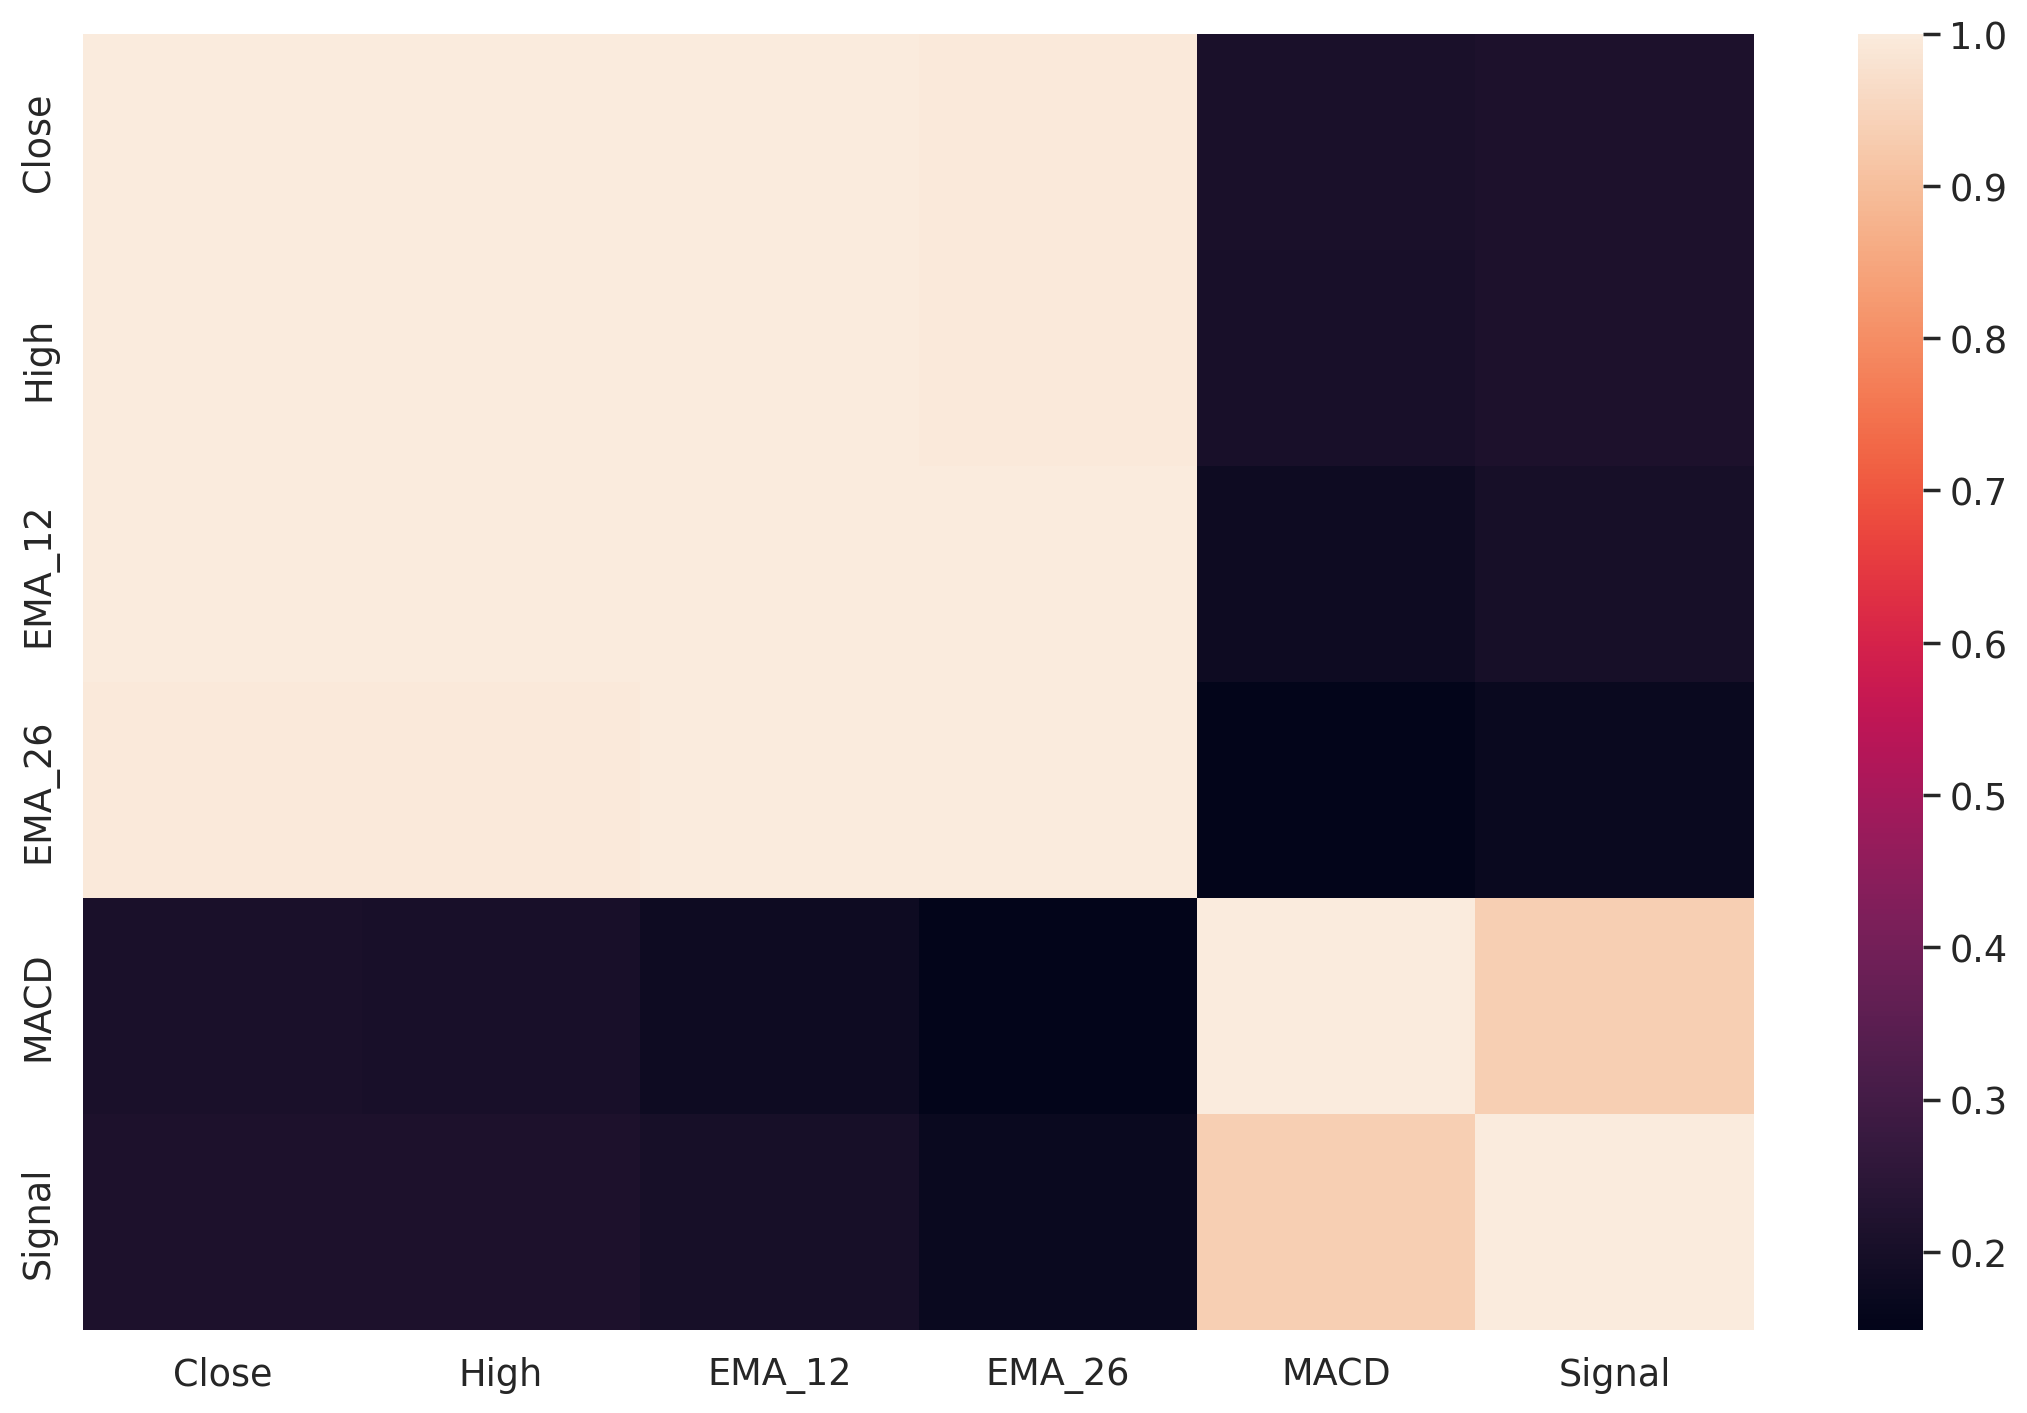

In [ ]:
# Calculate the correlation matrix
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

corr_p = df[['Close', 'High', 'EMA_12','EMA_26','MACD', 'Signal']].corr(method='pearson')
print('Pearson correlation matrix')
print(corr_p)

corr_s = df[['Close', 'High', 'EMA_12', 'EMA_26', 'MACD', 'Signal']].corr(method='spearman')
print('Spearman correlation matrix')
print(corr_s)

import seaborn as sns
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_s)

"""
# MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal'], label='Signal Line', color='red')
plt.legend(loc='upper left')
plt.title('MACD and Signal Line')
plt.show()
"""

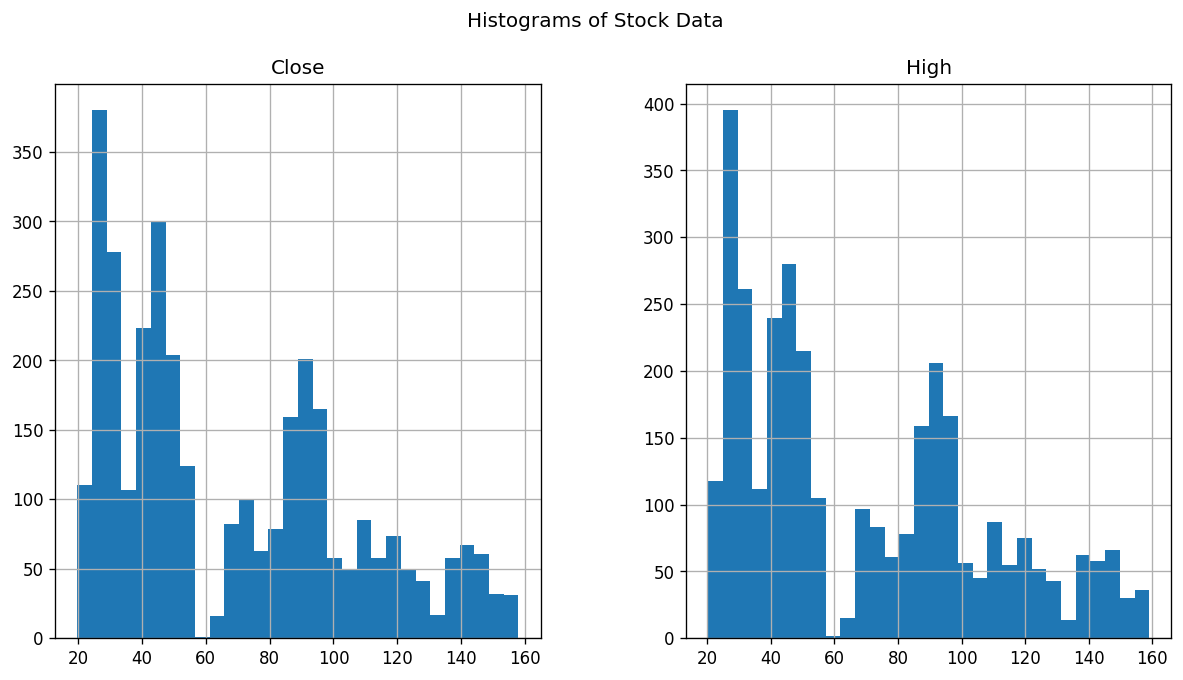

In [ ]:
# Histograms for Distribution of Each Column
df[['Close', 'High']].hist(bins=30, figsize=(12, 6))
plt.suptitle('Histograms of Stock Data')
plt.show()

Necessary check for ensuring no missing values

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0


Attempt to identify anomalies

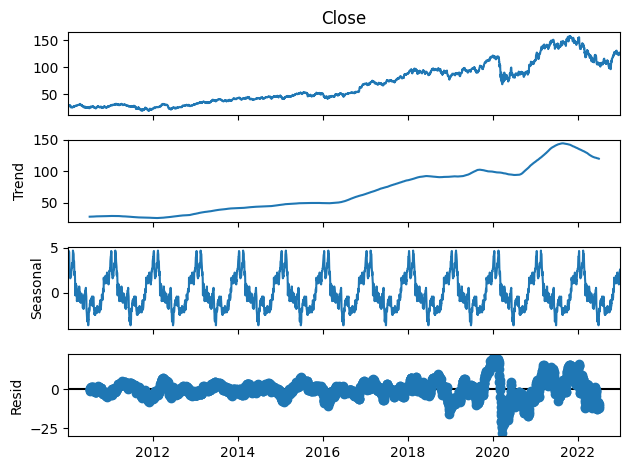

In [ ]:
import statsmodels.api as sm

# Decompose the time series into trend, seasonal, and residual components
# Approximately 252 trading days in year
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=252)

# Plot the components
decomposition.plot()
plt.show()

# Extract residuals (where outliers will appear)
residuals = decomposition.resid

# First LSTM Model: 4-Hidden Layers with Tanh Activation Function

In [5]:
# https://www.kaggle.com/code/nafisur/intro-to-recurrent-neural-networks-using-lstms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error

df['Name'] = 'JPM'

df.head(5)

,Open,High,Low,Close,Name
Date,,,,,
2010-01-04 00:00:00-05:00,28.435307,29.251828,28.353653,29.156565,JPM
2010-01-05 00:00:00-05:00,29.115721,29.830175,29.108915,29.721306,JPM
2010-01-06 00:00:00-05:00,29.564817,30.000294,29.469557,29.884619,JPM
2010-01-07 00:00:00-05:00,29.796169,30.701144,29.673691,30.476603,JPM
2010-01-08 00:00:00-05:00,30.190815,30.415360,29.993492,30.401751,JPM


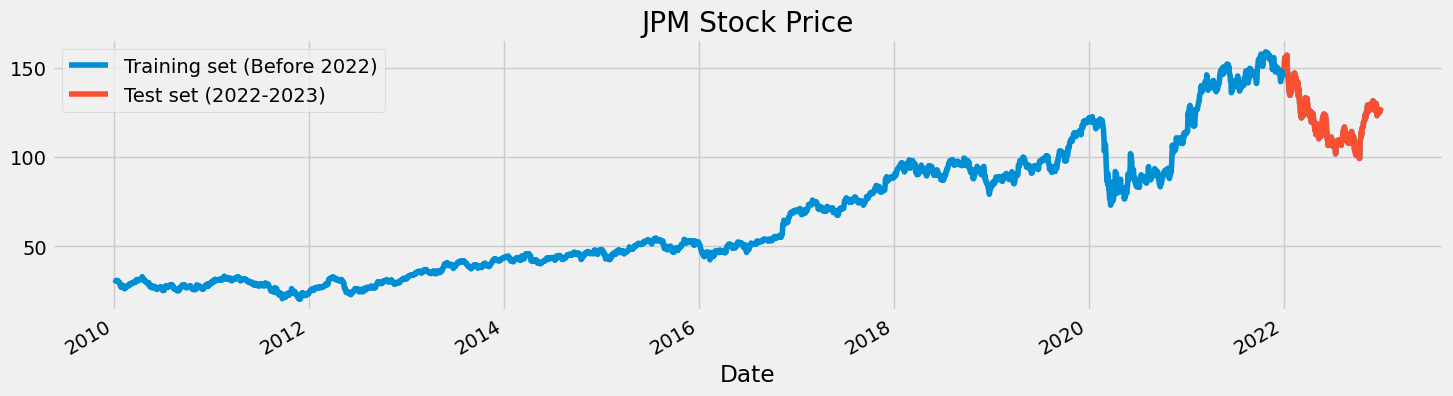

In [7]:
# Splitting the dataset: training data from 2022 and earlier on, test data from 2022 onward
training_set = df[:'2022'].iloc[:,1:2].values
test_set = df['2022':].iloc[:,1:2].values

# We have chosen 'High' attribute for prices prediction
df["High"][:'2022'].plot(figsize=(16,4),legend=True)
df["High"]['2022':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2022)','Test set (2022-2023)'])
plt.title('JPM Stock Price')
plt.show()

In [9]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

In [17]:
%%time

# The RNN architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0313
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0034
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0030
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0032
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0025
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0025
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0023
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0021
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0021
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0016
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0019
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0019
Epoch 13/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0018
Epoch 14/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0017
Epoch 15/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step 

In [ ]:
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
df_total = pd.concat((df["High"][:'2022'], df["High"]['2022':]),axis=0)
inputs = df_total[len(df_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


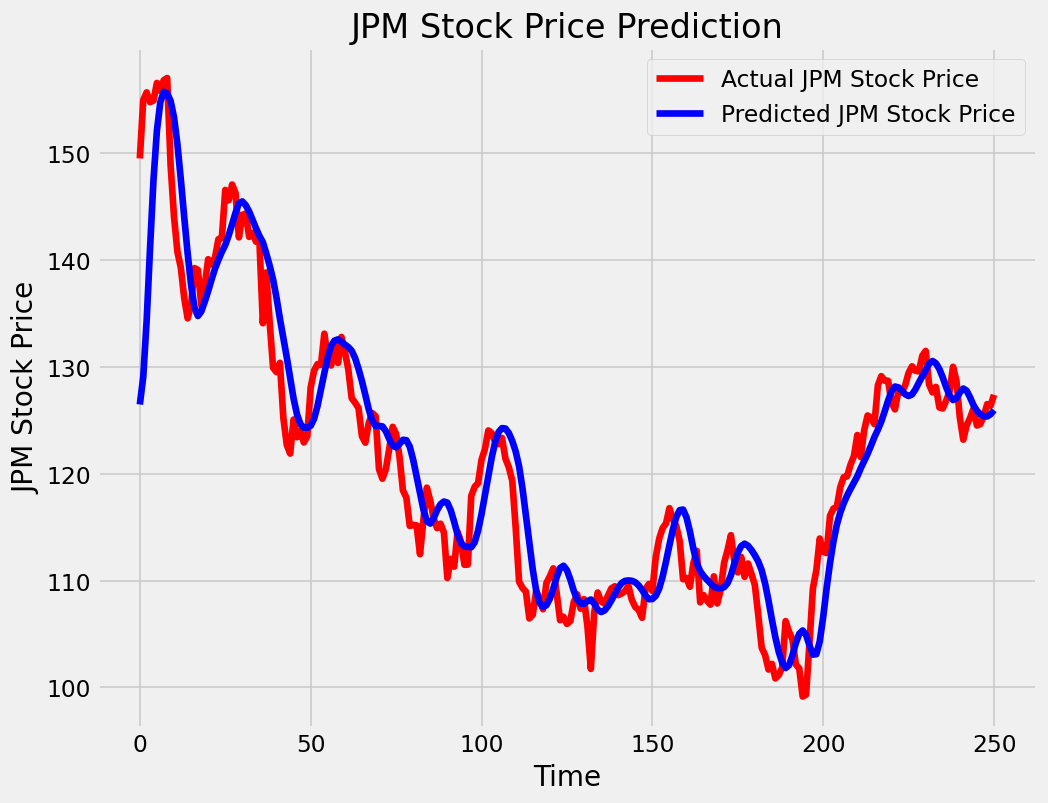

In [ ]:
# Visualizing the results
plt.plot(test_set, color='red',label='Actual JPM Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted JPM Stock Price')
plt.title('JPM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('JPM Stock Price')
plt.legend()
plt.show()

In [ ]:
# Evaluating our model
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The Root Mean Squared Error (RMSE) is: {}".format(rmse))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_set, predicted_stock_price)
print("The Mean Absolute Error (MAE) is: {}".format(mae))

# The Root Mean Squared Error (RMSE) is: 4.575446041968749
# The Mean Absolute Error (MAE) is: 3.2409149181030426

The Root Mean Squared Error (RMSE) is: 4.575446041968749
The Mean Absolute Error (MAE) is: 3.2409149181030426


# Attempt to extend up to current stock data

**From 2010 to 2024**

In [ ]:
ticker_symbol = 'JPM'

# Pulling data from yahoo finance
stock_data = yf.Ticker(ticker_symbol)

# Specify period up until the Friday of 22nd 2024
historical_data = stock_data.history(start='2010-01-01', end='2024-11-22')

# Feature selection
dataset = historical_data[['Open', 'High', 'Low', 'Close']]

# Creating dataframe
df = pd.DataFrame(dataset)
df['Name'] = 'JPM'

In [ ]:
# Splitting the dataset: training data until 2023, test data from 2023 onward
training_set = df[:'2023'].iloc[:, 1:2].values
test_set = df['2023':].iloc[:, 1:2].values

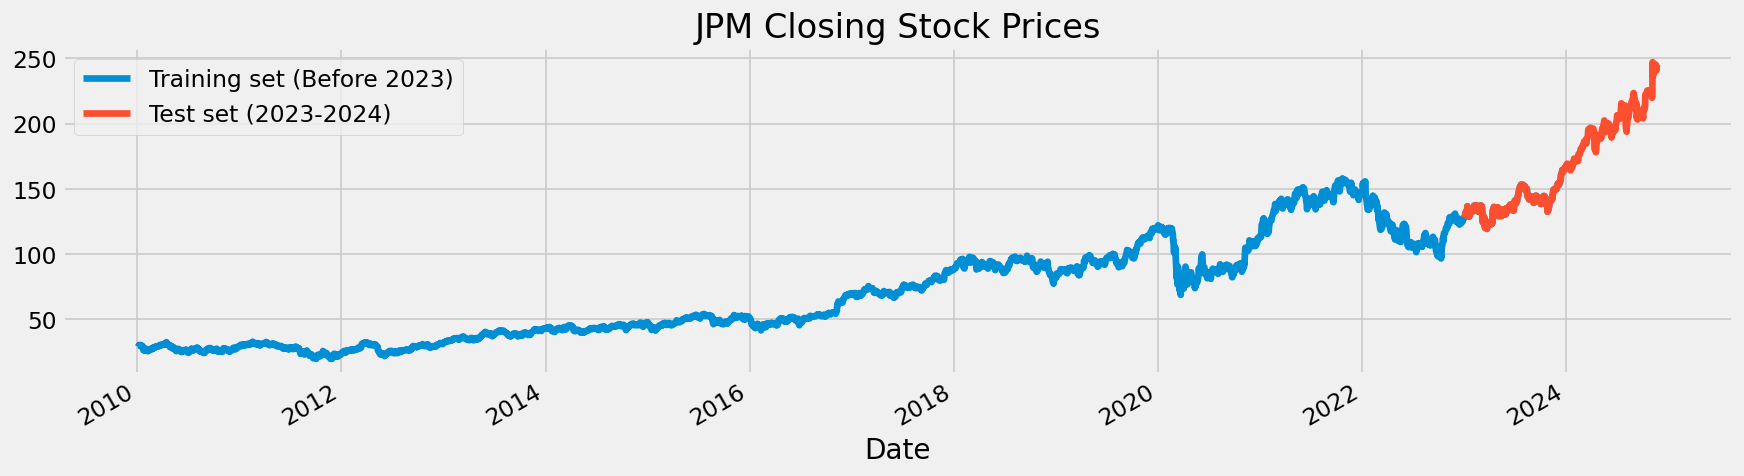

In [ ]:
# We have chosen 'High' attribute for prices prediction
df["Close"][:'2023'].plot(figsize=(16,4),legend=True)
df["Close"]['2023':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2023)','Test set (2023-2024)'])
plt.title('JPM Closing Stock Prices')
plt.show()

In [ ]:
# Scaling the new training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Create a data structure with 60 timesteps and 1 output for the new training data
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# The RNN architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - loss: 0.0345
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - loss: 0.0032
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 0.0031
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - loss: 0.0030
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - loss: 0.0024
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - loss: 0.0025
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - loss: 0.0024
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - loss: 0.0024
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - loss: 0.0021
Epoch 10/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - loss: 0.0019
Epoch 11/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - loss: 0.0019
Epoch 12/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 0.0019
Epoch 13/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - loss: 0.0021
Epoch 14/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - loss: 0.0017
Epoch 15/50
109/109 ━━━━━━

In [ ]:
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
df_total = pd.concat((df["Close"][:'2023'], df["Close"]['2023':]),axis=0)
inputs = df_total[len(df_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


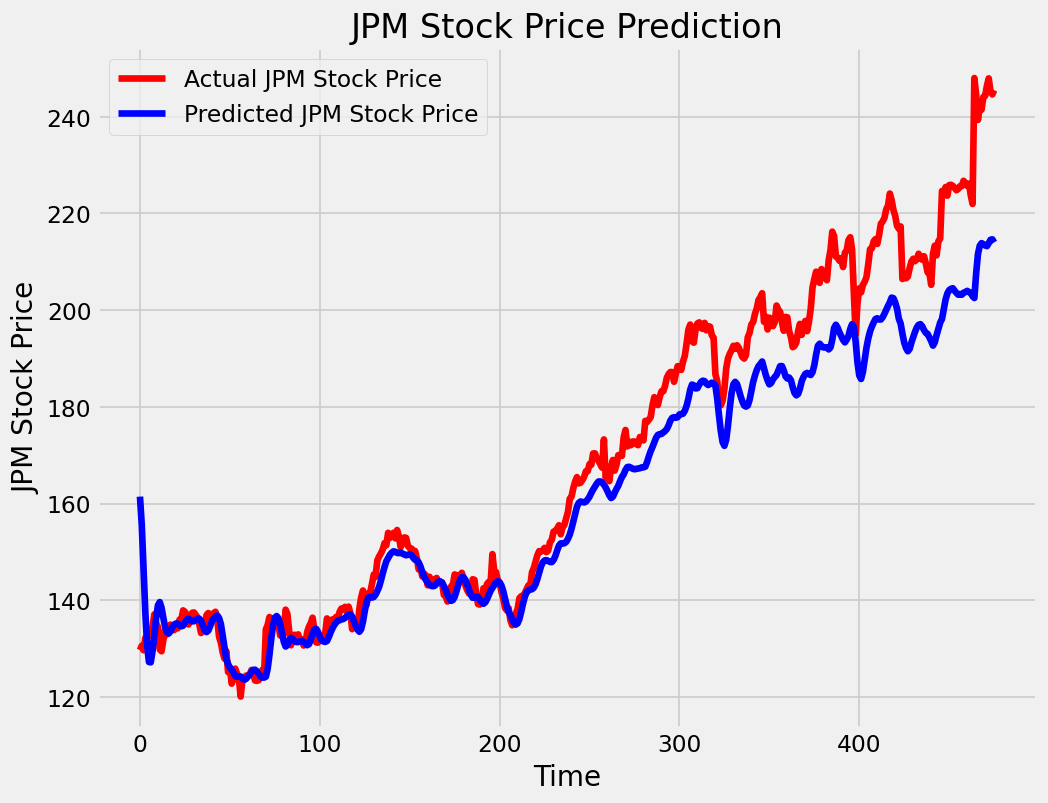

In [ ]:
# Visualizing the results
plt.plot(test_set, color='red',label='Actual JPM Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted JPM Stock Price')
plt.title('JPM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('JPM Stock Price')
plt.legend()
plt.show()

In [ ]:
# Evaluating our model
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The Root Mean Squared Error (RMSE) is: {}".format(rmse))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_set, predicted_stock_price)
print("The Mean Absolute Error (MAE) is: {}".format(mae))

# The Root Mean Squared Error (RMSE) is: 4.575446041968749
# The Mean Absolute Error (MAE) is: 3.2409149181030426

The Root Mean Squared Error (RMSE) is: 10.992961215280692
The Mean Absolute Error (MAE) is: 7.921047367952747


# Second LSTM Model: 6-Hidden Layers with ReLU Activation Function

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error

# Pulling data from yahoo finance
stock_data = yf.Ticker(ticker_symbol)

# Specify period
historical_data = stock_data.history(start='2010-01-01', end='2023-01-01')

# Feature selection
dataset = historical_data[['Open', 'High', 'Low', 'Close']]

# Creating dataframe
df = pd.DataFrame(dataset)

df['Name'] = 'JPM'

df.head(5)

,Open,High,Low,Close,Name
Date,,,,,
2010-01-04 00:00:00-05:00,28.435307,29.251828,28.353653,29.156565,JPM
2010-01-05 00:00:00-05:00,29.115721,29.830175,29.108915,29.721306,JPM
2010-01-06 00:00:00-05:00,29.564817,30.000294,29.469557,29.884619,JPM
2010-01-07 00:00:00-05:00,29.796169,30.701144,29.673691,30.476603,JPM
2010-01-08 00:00:00-05:00,30.190815,30.415360,29.993492,30.401751,JPM


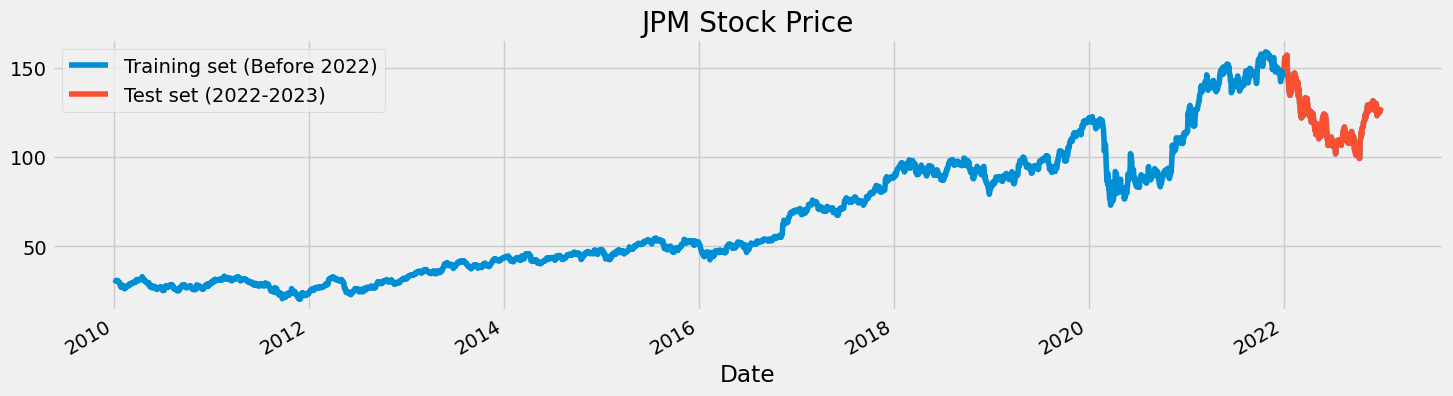

In [21]:
# Splitting the dataset: training data from 2022 and earlier on, test data from 2022 onward
training_set = df[:'2022'].iloc[:,1:2].values
test_set = df['2022':].iloc[:,1:2].values

# We have chosen 'High' attribute for prices prediction
df["High"][:'2022'].plot(figsize=(16,4),legend=True)
df["High"]['2022':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2022)','Test set (2022-2023)'])
plt.title('JPM Stock Price')
plt.show()

In [23]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [25]:
# Create a data structure with 60 timesteps and 1 output for the new training data
X_train = []
y_train = []
for i in range(60,3020):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

In [29]:
%%time

# The RNN architecture
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='relu'))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, activation='relu'))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, activation='relu'))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, activation='relu'))
regressor.add(Dropout(0.2))

# Fifth LSTM layer (additional layer)
regressor.add(LSTM(units=50, return_sequences=True, activation='relu'))
regressor.add(Dropout(0.2))

# Sixth LSTM layer (additional layer)
regressor.add(LSTM(units=50, activation='relu'))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units=1))  # Linear activation for regression

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting to the training set
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0729
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0063
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0048
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0042
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0042
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0044
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0041
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0041
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0032
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0038
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0032
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0029
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0030
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0032
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0034
Epoch 16/50
93/

In [60]:
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
df_total = pd.concat((df["High"][:'2022'], df["High"]['2022':]),axis=0)
inputs = df_total[len(df_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [62]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


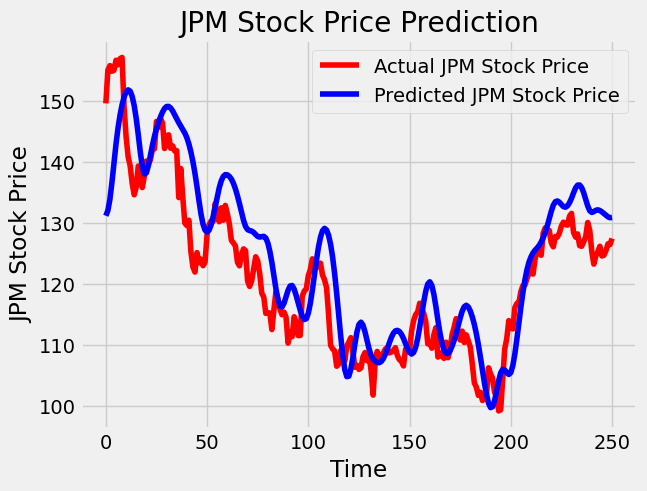

In [64]:
# Visualizing the results
plt.plot(test_set, color='red',label='Actual JPM Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted JPM Stock Price')
plt.title('JPM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('JPM Stock Price')
plt.legend()
plt.show()

In [66]:
# Evaluating our model
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The Root Mean Squared Error (RMSE) is: {}".format(rmse))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_set, predicted_stock_price)
print("The Mean Absolute Error (MAE) is: {}".format(mae))

# The Root Mean Squared Error (RMSE) is: 4.575446041968749
# The Mean Absolute Error (MAE) is: 3.2409149181030426

The Root Mean Squared Error (RMSE) is: 7.018729035862787
The Mean Absolute Error (MAE) is: 5.559316446779338


# Hyperparameter Tuning

# Bayesian Optimization on LSTM w/ 4-hidden layers and Tanh Activation Function

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import optuna

# Data Preprocessing
ticker_symbol = 'JPM'
stock_data = yf.Ticker(ticker_symbol)
historical_data = stock_data.history(start='2010-01-01', end='2023-01-01')
dataset = historical_data[['Open', 'High', 'Low', 'Close']]
df = pd.DataFrame(dataset)

# Splitting the dataset
training_set = df[:'2022'].iloc[:, 1:2].values
test_set = df['2022':].iloc[:, 1:2].values

# Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define the objective function for Bayesian optimization
def objective(trial):
    # Define hyperparameter search space
    lstm_units = trial.suggest_int("lstm_units", 50, 200, step=50)
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    epochs = trial.suggest_categorical("epochs", [10, 20, 50])

    # Building the model
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Evaluate the model on the training data (use a validation set in practice)
    y_pred = model.predict(X_train)
    loss = mean_squared_error(y_train, y_pred)

    return loss

In [21]:
# Running the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Print the best parameters
print("Best parameters:")
print(study.best_params)

[I 2024-11-23 20:30:58,788] A new study created in memory with name: no-name-b8a9f3df-741f-4976-8e23-69a5127a952b
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[I 2024-11-23 20:32:11,257] Trial 0 finished with value: 0.000705651020781992 and parameters: {'lstm_units': 100, 'dropout_rate': 0.30000000000000004, 'learning_rate': 3.547954526390807e-05, 'batch_size': 64, 'epochs': 20}. Best is trial 0 with value: 0.000705651020781992.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


[I 2024-11-23 20:37:47,621] Trial 1 finished with value: 0.00023357559593707491 and parameters: {'lstm_units': 150, 'dropout_rate': 0.2, 'learning_rate': 0.005344734705282769, 'batch_size': 64, 'epochs': 50}. Best is trial 1 with value: 0.00023357559593707491.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


[I 2024-11-23 20:38:29,874] Trial 2 finished with value: 0.0004988003336745706 and parameters: {'lstm_units': 100, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.002017755639615165, 'batch_size': 64, 'epochs': 10}. Best is trial 1 with value: 0.00023357559593707491.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step


[I 2024-11-23 20:47:18,968] Trial 3 finished with value: 0.0002758391055291818 and parameters: {'lstm_units': 200, 'dropout_rate': 0.4, 'learning_rate': 1.4212899035520157e-05, 'batch_size': 64, 'epochs': 50}. Best is trial 1 with value: 0.00023357559593707491.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


[I 2024-11-23 20:48:41,585] Trial 4 finished with value: 0.000833055273666573 and parameters: {'lstm_units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.0017180490348489288, 'batch_size': 64, 'epochs': 20}. Best is trial 1 with value: 0.00023357559593707491.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


[I 2024-11-23 20:51:38,472] Trial 5 finished with value: 0.0004406151758738621 and parameters: {'lstm_units': 150, 'dropout_rate': 0.4, 'learning_rate': 0.0001506869370581875, 'batch_size': 64, 'epochs': 20}. Best is trial 1 with value: 0.00023357559593707491.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


[I 2024-11-23 20:52:50,493] Trial 6 finished with value: 0.0004707960381698288 and parameters: {'lstm_units': 100, 'dropout_rate': 0.30000000000000004, 'learning_rate': 1.0764958038146379e-05, 'batch_size': 64, 'epochs': 20}. Best is trial 1 with value: 0.00023357559593707491.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[I 2024-11-23 20:54:42,577] Trial 7 finished with value: 0.000392735052563474 and parameters: {'lstm_units': 100, 'dropout_rate': 0.5, 'learning_rate': 0.0026210886838752613, 'batch_size': 32, 'epochs': 20}. Best is trial 1 with value: 0.00023357559593707491.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


[I 2024-11-23 21:04:45,031] Trial 8 finished with value: 0.00023288839286190777 and parameters: {'lstm_units': 150, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.00016578193028676108, 'batch_size': 16, 'epochs': 50}. Best is trial 8 with value: 0.00023288839286190777.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


[I 2024-11-23 21:19:09,665] Trial 9 finished with value: 0.0004408522618573987 and parameters: {'lstm_units': 200, 'dropout_rate': 0.2, 'learning_rate': 0.00010647609575855664, 'batch_size': 16, 'epochs': 50}. Best is trial 8 with value: 0.00023288839286190777.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


[I 2024-11-23 21:19:49,786] Trial 10 finished with value: 0.000563137778536262 and parameters: {'lstm_units': 50, 'dropout_rate': 0.5, 'learning_rate': 0.0004831233258624584, 'batch_size': 16, 'epochs': 10}. Best is trial 8 with value: 0.00023288839286190777.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


[I 2024-11-23 21:29:30,797] Trial 11 finished with value: 0.00024900737121635977 and parameters: {'lstm_units': 150, 'dropout_rate': 0.2, 'learning_rate': 0.0005758451513355304, 'batch_size': 16, 'epochs': 50}. Best is trial 8 with value: 0.00023288839286190777.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


[I 2024-11-23 21:36:26,980] Trial 12 finished with value: 0.00016529286782857865 and parameters: {'lstm_units': 150, 'dropout_rate': 0.2, 'learning_rate': 0.008572122807524184, 'batch_size': 32, 'epochs': 50}. Best is trial 12 with value: 0.00016529286782857865.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


[I 2024-11-23 21:46:26,177] Trial 13 finished with value: 0.00013580408894635536 and parameters: {'lstm_units': 200, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.009488911976945508, 'batch_size': 32, 'epochs': 50}. Best is trial 13 with value: 0.00013580408894635536.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


[I 2024-11-23 21:55:08,056] Trial 14 finished with value: 0.0006473793068859981 and parameters: {'lstm_units': 200, 'dropout_rate': 0.4, 'learning_rate': 0.006571861041947918, 'batch_size': 32, 'epochs': 50}. Best is trial 13 with value: 0.00013580408894635536.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


[I 2024-11-23 22:03:20,146] Trial 15 finished with value: 0.000488626447065282 and parameters: {'lstm_units': 200, 'dropout_rate': 0.2, 'learning_rate': 0.009974283430990305, 'batch_size': 32, 'epochs': 50}. Best is trial 13 with value: 0.00013580408894635536.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step


[I 2024-11-23 22:12:13,694] Trial 16 finished with value: 0.00042780807527764394 and parameters: {'lstm_units': 200, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0009679324274182083, 'batch_size': 32, 'epochs': 50}. Best is trial 13 with value: 0.00013580408894635536.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


[I 2024-11-23 22:13:33,762] Trial 17 finished with value: 0.0005072828096945351 and parameters: {'lstm_units': 150, 'dropout_rate': 0.2, 'learning_rate': 0.002951978860644576, 'batch_size': 32, 'epochs': 10}. Best is trial 13 with value: 0.00013580408894635536.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2024-11-23 22:15:25,019] Trial 18 finished with value: 0.0005963210014576213 and parameters: {'lstm_units': 50, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.005332163084814646, 'batch_size': 32, 'epochs': 50}. Best is trial 13 with value: 0.00013580408894635536.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


[I 2024-11-23 22:25:00,414] Trial 19 finished with value: 0.000217362135676252 and parameters: {'lstm_units': 200, 'dropout_rate': 0.4, 'learning_rate': 0.008612060025380093, 'batch_size': 32, 'epochs': 50}. Best is trial 13 with value: 0.00013580408894635536.


Best parameters:
{'lstm_units': 200, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.009488911976945508, 'batch_size': 32, 'epochs': 50}


In [23]:
# Train the final model with the best parameters
best_params = study.best_params

final_model = Sequential()
final_model.add(LSTM(units=best_params['lstm_units'], return_sequences=True, input_shape=(X_train.shape[1], 1)))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(LSTM(units=best_params['lstm_units'], return_sequences=True))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(LSTM(units=best_params['lstm_units']))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(units=1))

final_model.compile(optimizer='adam', loss='mean_squared_error')
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Model is now trained with the optimal hyperparameters!

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - loss: 0.0338
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0017
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0018
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 0.0014
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 0.0014
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0011
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 0.0014
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - loss: 0.0012
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0012
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0012
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0011
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.0012
Epoch 13/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0011
Epoch 14/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0011
Epoch 15/50
101/101 ━━━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


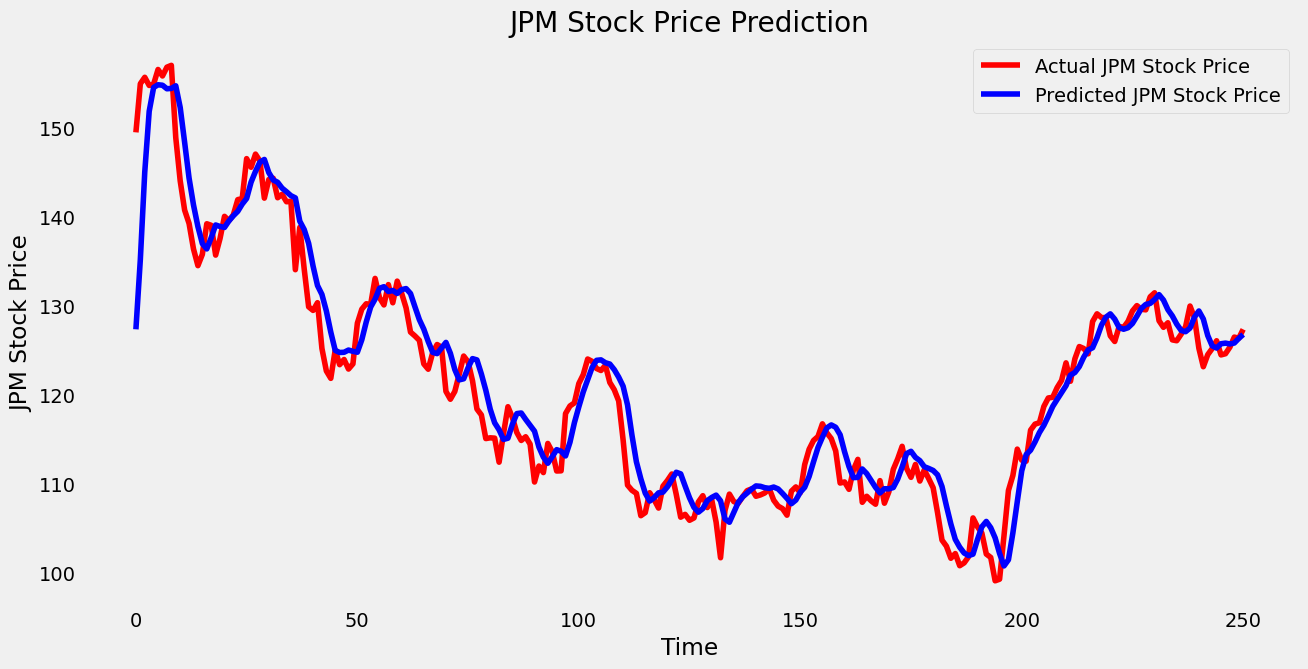

In [25]:
# Preparing the test data
df_total = pd.concat((df["High"][:'2022'], df["High"]['2022':]), axis=0)
inputs = df_total[len(df_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Preparing X_test
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting stock prices using the optimized model
predicted_stock_price = final_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizing the results
plt.figure(figsize=(14, 7))
plt.plot(test_set, color='red', label='Actual JPM Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted JPM Stock Price')
plt.title('JPM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('JPM Stock Price')
plt.legend()
plt.grid()
plt.show()


In [27]:
# Evaluating our model
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The Root Mean Squared Error (RMSE) is: {}".format(rmse))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_set, predicted_stock_price)
print("The Mean Absolute Error (MAE) is: {}".format(mae))

# The Root Mean Squared Error (RMSE) is: 4.575446041968749
# The Mean Absolute Error (MAE) is: 3.2409149181030426

The Root Mean Squared Error (RMSE) is: 3.4865943682665472
The Mean Absolute Error (MAE) is: 2.4219782698066012


# Bayesian Optimization on LSTM w/ 6-hidden layers and ReLU Activation Function

In [91]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import optuna
from sklearn.metrics import mean_squared_error

# Data Preprocessing
ticker_symbol = 'JPM'
stock_data = yf.Ticker(ticker_symbol)
historical_data = stock_data.history(start='2010-01-01', end='2023-01-01')
dataset = historical_data[['Open', 'High', 'Low', 'Close']]
df = pd.DataFrame(dataset)

# Splitting the dataset
training_set = df[:'2022'].iloc[:, 1:2].values
test_set = df['2022':].iloc[:, 1:2].values

# Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define the objective function for Bayesian optimization
def objective(trial):
    # Define hyperparameter search space
    lstm_units = trial.suggest_int("lstm_units", 50, 200, step=50)
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    epochs = trial.suggest_categorical("epochs", [10, 20, 50])

    # Building the model with 6 hidden layers and ReLU activation
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=lstm_units, activation='relu'))  # Adding a dense layer with ReLU
    model.add(Dense(units=1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Evaluate the model on the training data (use a validation set in practice)
    y_pred = model.predict(X_train)
    loss = mean_squared_error(y_train, y_pred)

    return loss

In [92]:
# Running the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Print the best parameters
print("Best parameters:")
print(study.best_params)

# Train the final model with the best parameters
best_params = study.best_params

[I 2024-11-27 11:02:38,466] A new study created in memory with name: no-name-cd6aec61-a3db-449a-8913-75d96e81df9b
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step


[I 2024-11-27 11:15:45,439] Trial 0 finished with value: 0.00038109810673279054 and parameters: {'lstm_units': 150, 'dropout_rate': 0.4, 'learning_rate': 0.0007140357028508888, 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


[I 2024-11-27 11:17:05,633] Trial 1 finished with value: 0.0024411997505244037 and parameters: {'lstm_units': 50, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0003782973568224257, 'batch_size': 64, 'epochs': 20}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


[I 2024-11-27 11:25:12,115] Trial 2 finished with value: 0.0004537741390708942 and parameters: {'lstm_units': 100, 'dropout_rate': 0.4, 'learning_rate': 0.0020752435608578767, 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step


[I 2024-11-27 11:27:41,239] Trial 3 finished with value: 0.0007259872590173166 and parameters: {'lstm_units': 100, 'dropout_rate': 0.2, 'learning_rate': 1.5695823675366212e-05, 'batch_size': 16, 'epochs': 10}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2024-11-27 11:28:19,546] Trial 4 finished with value: 0.0009818086474337056 and parameters: {'lstm_units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.00014336984648967072, 'batch_size': 64, 'epochs': 10}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2024-11-27 11:33:36,645] Trial 5 finished with value: 0.007926106295438095 and parameters: {'lstm_units': 50, 'dropout_rate': 0.5, 'learning_rate': 1.6804511032782233e-05, 'batch_size': 16, 'epochs': 50}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


[I 2024-11-27 11:34:44,875] Trial 6 finished with value: 0.001113058595736511 and parameters: {'lstm_units': 100, 'dropout_rate': 0.4, 'learning_rate': 0.0002430581323200088, 'batch_size': 64, 'epochs': 10}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step


[I 2024-11-27 11:38:10,260] Trial 7 finished with value: 0.0006403320722997072 and parameters: {'lstm_units': 150, 'dropout_rate': 0.4, 'learning_rate': 0.0028697368831020337, 'batch_size': 64, 'epochs': 20}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


[I 2024-11-27 11:39:16,065] Trial 8 finished with value: 0.0011387911387143353 and parameters: {'lstm_units': 100, 'dropout_rate': 0.4, 'learning_rate': 0.0006747522131367062, 'batch_size': 64, 'epochs': 10}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


[I 2024-11-27 11:41:36,760] Trial 9 finished with value: 0.000806279215031206 and parameters: {'lstm_units': 100, 'dropout_rate': 0.4, 'learning_rate': 7.408121026517089e-05, 'batch_size': 16, 'epochs': 10}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step


[I 2024-11-27 11:56:22,787] Trial 10 finished with value: 0.00038110665285162897 and parameters: {'lstm_units': 200, 'dropout_rate': 0.5, 'learning_rate': 0.007930341956280744, 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step


[I 2024-11-27 12:11:17,841] Trial 11 finished with value: 0.0006716720242630236 and parameters: {'lstm_units': 200, 'dropout_rate': 0.5, 'learning_rate': 0.00802214985628012, 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step


[I 2024-11-27 12:25:52,334] Trial 12 finished with value: 0.0005153257334491934 and parameters: {'lstm_units': 200, 'dropout_rate': 0.5, 'learning_rate': 0.009723717151424286, 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step


[I 2024-11-27 12:36:29,055] Trial 13 finished with value: 0.0005575835336896634 and parameters: {'lstm_units': 150, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0013724062827619886, 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 0.00038109810673279054.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step


[I 2024-11-27 12:50:59,135] Trial 14 finished with value: 0.00034465945945647193 and parameters: {'lstm_units': 200, 'dropout_rate': 0.5, 'learning_rate': 0.0039820046550094286, 'batch_size': 32, 'epochs': 50}. Best is trial 14 with value: 0.00034465945945647193.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step


[I 2024-11-27 13:01:46,350] Trial 15 finished with value: 0.0003170314736052925 and parameters: {'lstm_units': 150, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0009720304303261586, 'batch_size': 32, 'epochs': 50}. Best is trial 15 with value: 0.0003170314736052925.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step


[I 2024-11-27 13:07:36,008] Trial 16 finished with value: 0.0005933375722492086 and parameters: {'lstm_units': 200, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0037524726200702124, 'batch_size': 32, 'epochs': 20}. Best is trial 15 with value: 0.0003170314736052925.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step


[I 2024-11-27 13:18:19,551] Trial 17 finished with value: 0.00045276309114950007 and parameters: {'lstm_units': 150, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0010339778571371698, 'batch_size': 32, 'epochs': 50}. Best is trial 15 with value: 0.0003170314736052925.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step


[I 2024-11-27 13:32:37,209] Trial 18 finished with value: 0.00021078678908930748 and parameters: {'lstm_units': 200, 'dropout_rate': 0.2, 'learning_rate': 0.0038395436811075306, 'batch_size': 32, 'epochs': 50}. Best is trial 18 with value: 0.00021078678908930748.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step


[I 2024-11-27 13:43:26,838] Trial 19 finished with value: 0.0005116055016837742 and parameters: {'lstm_units': 150, 'dropout_rate': 0.2, 'learning_rate': 7.279470305607405e-05, 'batch_size': 32, 'epochs': 50}. Best is trial 18 with value: 0.00021078678908930748.


Best parameters:
{'lstm_units': 200, 'dropout_rate': 0.2, 'learning_rate': 0.0038395436811075306, 'batch_size': 32, 'epochs': 50}


In [93]:
final_model = Sequential()
final_model.add(LSTM(units=best_params['lstm_units'], return_sequences=True, input_shape=(X_train.shape[1], 1)))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(LSTM(units=best_params['lstm_units'], return_sequences=True))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(LSTM(units=best_params['lstm_units'], return_sequences=True))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(LSTM(units=best_params['lstm_units'], return_sequences=True))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(LSTM(units=best_params['lstm_units']))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(units=best_params['lstm_units'], activation='relu'))  # ReLU activation for dense layer
final_model.add(Dense(units=1))  # Output layer

final_model.compile(optimizer='adam', loss='mean_squared_error')
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - loss: 0.0298
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - loss: 0.0017
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - loss: 0.0019
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - loss: 0.0018
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - loss: 0.0014
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - loss: 0.0012
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - loss: 0.0012
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - loss: 9.4180e-04
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - loss: 8.7391e-04
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - loss: 9.9551e-04
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - loss: 9.7203e-04
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - loss: 7.4100e-04
Epoch 13/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - loss: 7.6617e-04
Epoch 14/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - loss: 7.9817e-0

In [94]:
# Preparing the test data
df_total = pd.concat((df["High"][:'2022'], df["High"]['2022':]), axis=0)
inputs = df_total[len(df_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [95]:
# Preparing X_test
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


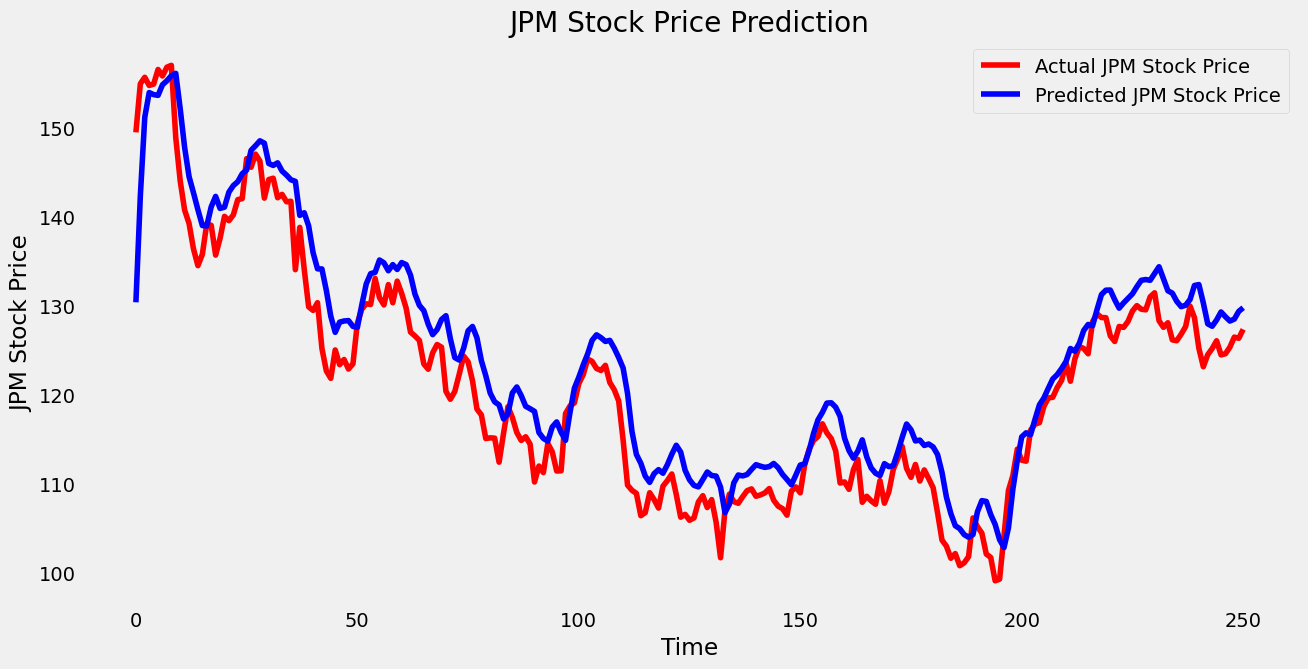

In [96]:
# Predicting stock prices using the optimized model
predicted_stock_price = final_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizing the results
plt.figure(figsize=(14, 7))
plt.plot(test_set, color='red', label='Actual JPM Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted JPM Stock Price')
plt.title('JPM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('JPM Stock Price')
plt.legend()
plt.grid()
plt.show()

In [108]:
# Evaluating our model
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The Root Mean Squared Error (RMSE) is: {}".format(rmse))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_set, predicted_stock_price)
print("The Mean Absolute Error (MAE) is: {}".format(mae))

# The Root Mean Squared Error (RMSE) is: 4.575446041968749
# The Mean Absolute Error (MAE) is: 3.2409149181030426

The Root Mean Squared Error (RMSE) is: 4.327072423738516
The Mean Absolute Error (MAE) is: 3.582745429644402


# Grid Search on LSTM w/ 4-hidden layers and Tanh Activation Function

In [32]:
!pip install --upgrade scikeras

In [ ]:
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Load and preprocess data
training_set = df[:'2022'].iloc[:,1:2].values
test_set = df['2022':].iloc[:,1:2].values

# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

# Prepare training data (60 timesteps)
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the model function
def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model with KerasRegressor
model = KerasRegressor(model=create_model, epochs=50, batch_size=32)

# Define hyperparameters for grid search
param_grid = {
    'model__units': [50, 100],  # Number of LSTM units
    'model__dropout_rate': [0.2, 0.3],  # Dropout rate
    'batch_size': [32, 64],  # Batch size
    'epochs': [50, 100]  # Number of epochs
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

In [20]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'batch_size': 64, 'epochs': 100, 'model__dropout_rate': 0.3, 'model__units': 100}


In [29]:
# Predict using the best model
# Best Parameters: {'batch_size': 64, 'epochs': 100, 'model__dropout_rate': 0.3, 'model__units': 100}
# Best Score: 0.9809981765149448

best_units = best_params['model__units']
best_dropout_rate = best_params['model__dropout_rate']
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

# Create the model with the best parameters
best_model = create_model(units=best_units, dropout_rate=best_dropout_rate)
best_model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epochs)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0456
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0028
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0036
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0025
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0023
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0024
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0028
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0026
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0023
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0020
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0019
Epoch 12/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0017
Epoch 13/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0023
Epoch 14/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0019
Epoch 15/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0017
E

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


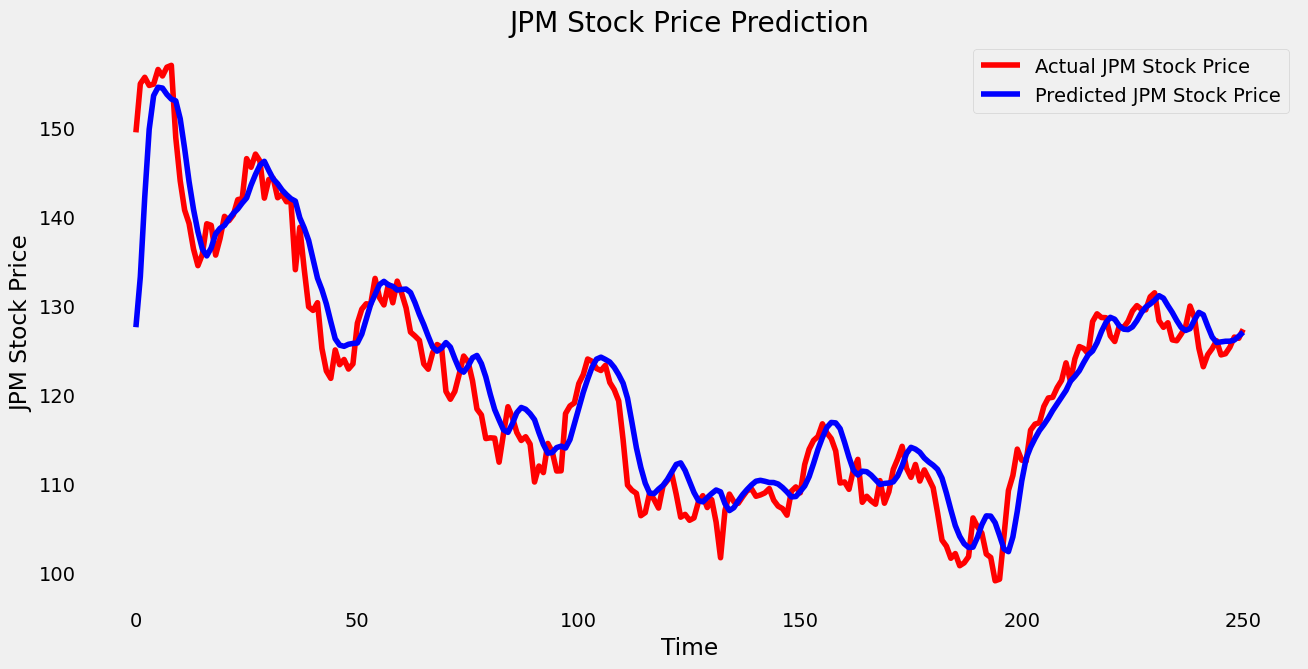

In [30]:
df_total = pd.concat((df["High"][:'2022'], df["High"]['2022':]), axis=0)
inputs = df_total[len(df_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = best_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(test_set, color='red', label='Actual JPM Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted JPM Stock Price')
plt.title('JPM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('JPM Stock Price')
plt.legend()
plt.grid()
plt.show()

In [34]:
# Evaluating our model
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The Root Mean Squared Error (RMSE) is: {}".format(rmse))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_set, predicted_stock_price)
print("The Mean Absolute Error (MAE) is: {}".format(mae))

# The Root Mean Squared Error (RMSE) is: 4.575446041968749
# The Mean Absolute Error (MAE) is: 3.2409149181030426

The Root Mean Squared Error (RMSE) is: 3.8295609276902507
The Mean Absolute Error (MAE) is: 2.7158102917093223


# Grid Search on LSTM w/ 6-hidden layers and ReLU Activation Function

In [76]:
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

# Pulling data from yahoo finance
stock_data = yf.Ticker(ticker_symbol)

# Specify period
historical_data = stock_data.history(start='2010-01-01', end='2023-01-01')

# Feature selection
dataset = historical_data[['Open', 'High', 'Low', 'Close']]

# Creating dataframe
df = pd.DataFrame(dataset)

df['Name'] = 'JPM'

# Load and preprocess data
training_set = df[:'2022'].iloc[:, 1:2].values
test_set = df['2022':].iloc[:, 1:2].values

# Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Prepare training data (60 timesteps)
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the 6-layer ReLU model function
def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    # 6 LSTM layers with ReLU activations
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, activation='relu'))
    model.add(Dropout(dropout_rate))
    # Output layer
    model.add(Dense(units=1))  # Regression output
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model with KerasRegressor
model = KerasRegressor(model=create_model, epochs=50, batch_size=32)

# Define the hyperparameters for grid search
param_grid = {
    'model__units': [50, 100],  # Number of LSTM units
    'model__dropout_rate': [0.2, 0.3],  # Dropout rates
    'batch_size': [32, 64],  # Batch sizes
    'epochs': [50, 100]  # Number of epochs
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1224
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0106
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0081
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0077
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0063
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0062
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0069
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0071
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0057
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0063
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0060
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0055
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0047
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0053
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0052
Epoch 16/50
67/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1252
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0103
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0082
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0071
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0059
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0056
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0055
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0057
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0049
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0047
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0052
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0051
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0049
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0042
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0039
Epoch 16/50
67/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0301
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0020
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0019
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0016
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0014
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0012
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0011
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0012
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0011
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0013
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0013
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 9.7034e-04
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0011
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 9.2228e-04
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 9.9962e-04
Epo

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.1001
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0068
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0055
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0041
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0048
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0053
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0041
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0040
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0051
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0042
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0038
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0036
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0033
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0034
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0033
Epoch 16/50
67/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.1093
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0066
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0060
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0068
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0050
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0053
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0038
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0040
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0038
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0035
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0036
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0033
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0037
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0034
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0029
Epoch 16/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 0.0211
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0016
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0013
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0012
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 7.8076e-04
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 8.8019e-04
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 8.5595e-04
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 7.6346e-04
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 8.2644e-04
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 7.9457e-04
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 9.0962e-04
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 7.7015e-04
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 7.4508e-04
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 7.5052e-04
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.1274
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0147
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0103
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0088
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0073
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0075
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0076
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0088
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0065
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0074
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0065
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0058
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0064
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0056
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0061
Epoch 16/50
67/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.1101
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0126
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0085
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0103
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0069
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0064
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0071
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0066
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0063
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0065
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0056
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0055
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0058
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0057
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0059
Epoch 16/50
67/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0276
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0030
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0027
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0018
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0019
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0019
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0018
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0017
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0013
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0013
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0012
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0012
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0012
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0012
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0012
Epoch 16/50
67/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.1070
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0085
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0080
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0074
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0056
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0061
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0071
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0049
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0051
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0051
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0050
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0042
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0048
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0048
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0052
Epoch 16/50
67/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0849
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0077
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0072
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0062
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0064
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0053
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0052
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0050
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0045
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0043
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0052
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0039
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0040
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0041
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0044
Epoch 16/50
67/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0235
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0016
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0015
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0015
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0013
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0010
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0011
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0014
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0010
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0011
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0012
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0016
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 9.5299e-04
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 9.0635e-04
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 9.4184e-0

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.1417
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0151
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0088
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0077
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0064
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0072
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0069
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0061
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0057
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0058
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0059
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0054
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0048
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0052
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0050
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.1234
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0109
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0075
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0075
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0058
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0072
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0066
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0058
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0057
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0059
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0050
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0048
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0048
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0051
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0058
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0300
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0026
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0020
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0016
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0015
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0014
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0015
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0012
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0012
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 9.1785e-04
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0011
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0010
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0011
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 9.0361e-04
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0988
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0075
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0050
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0050
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0052
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0048
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0045
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0042
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0045
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0041
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0035
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0044
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0036
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0035
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0033
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 0.1196
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0055
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0049
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0042
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0049
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0043
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0044
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0036
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0039
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0039
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0031
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0035
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0031
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0028
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0042
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.0181
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0014
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0012
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0011
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 8.7741e-04
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 8.4983e-04
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0010
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 8.9140e-04
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 7.0282e-04
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 7.9741e-04
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 8.0968e-04
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 7.8181e-04
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 7.2707e-04
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 7.9643e-04
Epoch 15/100
67/67 ━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.1453
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0190
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0130
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0097
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0096
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0103
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0078
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0082
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0085
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0090
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0078
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0079
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0080
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0068
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0061
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.1379
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0140
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0110
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0099
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0089
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0083
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0085
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0082
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0059
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0081
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0076
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0066
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0065
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0060
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0057
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0282
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0025
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0020
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0017
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0020
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0018
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0020
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0013
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0013
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0015
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.6078e-04
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0011
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0011
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0011
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.77

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.0925
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0093
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0062
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0056
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0066
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0052
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0062
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0050
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0046
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0043
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0047
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0044
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0046
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0042
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0042
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.1410
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0090
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0065
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0072
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0049
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0052
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0053
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0047
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0043
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0049
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0045
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0045
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0036
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0047
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - l

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0243
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0015
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0018
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0011
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0013
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0012
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0010
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0010
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 9.1224e-04
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 9.9987e-04
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 9.4369e-04
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0010
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0010   
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 8.7047e-04
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1892
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0215
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0124
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0077
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0063
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0069
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0052
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0060
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0052
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0056
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0058
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0059
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0052
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0052
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0048
Epoch 16/50
34/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.1645
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0281
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0088
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0093
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0082
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0067
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0065
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0060
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0054
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0056
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0056
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0052
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0050
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0061
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0052
Epoch 16/50
34/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0363
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0061
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0018
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0016
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0013
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0014
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0013
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0012
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0012
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0011
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0011
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0010
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0012
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0011
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0011
Epoch 16/50
34/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.1437
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.0104
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0074
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0053
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 0.0047
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0049
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0044
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0056
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0045
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0055
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0042
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0044
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0040
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0042
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - lo

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.1314
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0083
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0051
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0040
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0048
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0044
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0042
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0047
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0045
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0037
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0035
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0037
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0042
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0035
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0039


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.0293
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0026
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0010
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0013
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 8.7642e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 9.4360e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 9.5700e-04
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 8.6086e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 7.7642e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 7.7680e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 9.5588e-04
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 8.0951e-04
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 6.9201e-04
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 7.5152e-04
Epoch 15/50
34/34 ━━━━━━━━━━

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.1820
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0214
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0136
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0138
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0115
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0106
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0097
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0087
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0092
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0080
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0083
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0082
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0076
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0072
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0083
Epoch 16/50
34/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.1307
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0197
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0097
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0102
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0077
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0088
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0085
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0068
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0085
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0071
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0070
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0068
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0067
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0068
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0075
Epoch 16/50
34/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0374
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0057
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0025
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0021
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0019
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0017
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0017
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0016
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0018
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0016
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0016
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0016
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0015
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0013
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0012
Epoch 16/50
34/

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.1372
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0167
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0077
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0062
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0069
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0069
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0064
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0057
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0052
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0057
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0056
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0049
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0043
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0044
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0047


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.1331
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 0.0107
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0069
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0070
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0057
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0059
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0056
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0059
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0058
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0049
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0046
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0043
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0047
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0041
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0043


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0314
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0019
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0013
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0015
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0013
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0015
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0014
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0013
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0014
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0011
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0013
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0011
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0010  
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0013
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 9.553

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.1782
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0201
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0112
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0078
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0072
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0065
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0066
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0064
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0063
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0060
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0063
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0064
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0061
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0056
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0055
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.1721
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0250
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0093
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0062
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0070
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0061
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0067
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0060
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0055
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0058
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0060
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0047
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0047
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0057
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0051
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0347
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0046
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0016
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0015
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0013
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0013
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0011
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0011
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0011
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0011
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0011
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0011
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 9.4708e-04
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 9.7308e-04
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.1580
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0307
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0091
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0071
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0053
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0060
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0045
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0044
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0043
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0046
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0043
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0041
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0041
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0044
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step -

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 0.1606
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0415
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0061
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0059
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0055
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0051
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0045
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0050
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0049
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0044
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0053
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0044
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.0042
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0042
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step -

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0322
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.0027
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.0010   
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.0011
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 9.8015e-04
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 9.0807e-04
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.0011
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - loss: 9.1627e-04
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 9.2490e-04
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 9.5804e-04
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0010
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 8.5407e-04
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 7.7920e-04
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 8.1747e-04
Epoch 15/100
34/34 ━

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.1833
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0333
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0169
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0146
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0111
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0094
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0101
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0104
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0086
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0088
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0093
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0089
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0085
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0078
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0085
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.1562
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0234
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0107
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0096
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0100
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0085
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0079
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0068
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0065 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0063
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0078
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0071
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0064
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0061
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0062

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0360
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0047
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0023
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0019
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0019
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0018
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0017
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0016
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0016
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0014
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0017
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0017
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0014
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0015
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - loss: 0.1591
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - loss: 0.0293
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0118
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0084
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0074
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0071
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0059
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0066
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0057
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 0.0060
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0059
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - loss: 0.0054
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - loss: 0.0052
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0049
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step -

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - loss: 0.1706
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0678
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0106
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 0.0078
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 0.0074
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0066
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0064
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 0.0065
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0058
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0064
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0057
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.0064
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0070
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0056
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step -

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - loss: 0.0283
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0027
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - loss: 0.0015
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0015
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0014
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - loss: 0.0012
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0011
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0011
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - loss: 0.0012
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0011
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0012
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0010
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 9.7090e-04
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 9.9467e-04
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 165m

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0790
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0040
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 0.0037
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0036
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0034
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.0030
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0032
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0029
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0034
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0028
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0033
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0026
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0026
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0023
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0026


In [115]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'batch_size': 64, 'epochs': 50, 'model__dropout_rate': 0.2, 'model__units': 100}


In [117]:
best_units = best_params['model__units']
best_dropout_rate = best_params['model__dropout_rate']
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

# Create the model with the best parameters
best_model = create_model(units=best_units, dropout_rate=best_dropout_rate)
best_model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epochs)

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0787
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.0038
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0035
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0040
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0030
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0029
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0047
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0029
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0028
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0032
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0025
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0026
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 0.0031
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0023
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0021


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


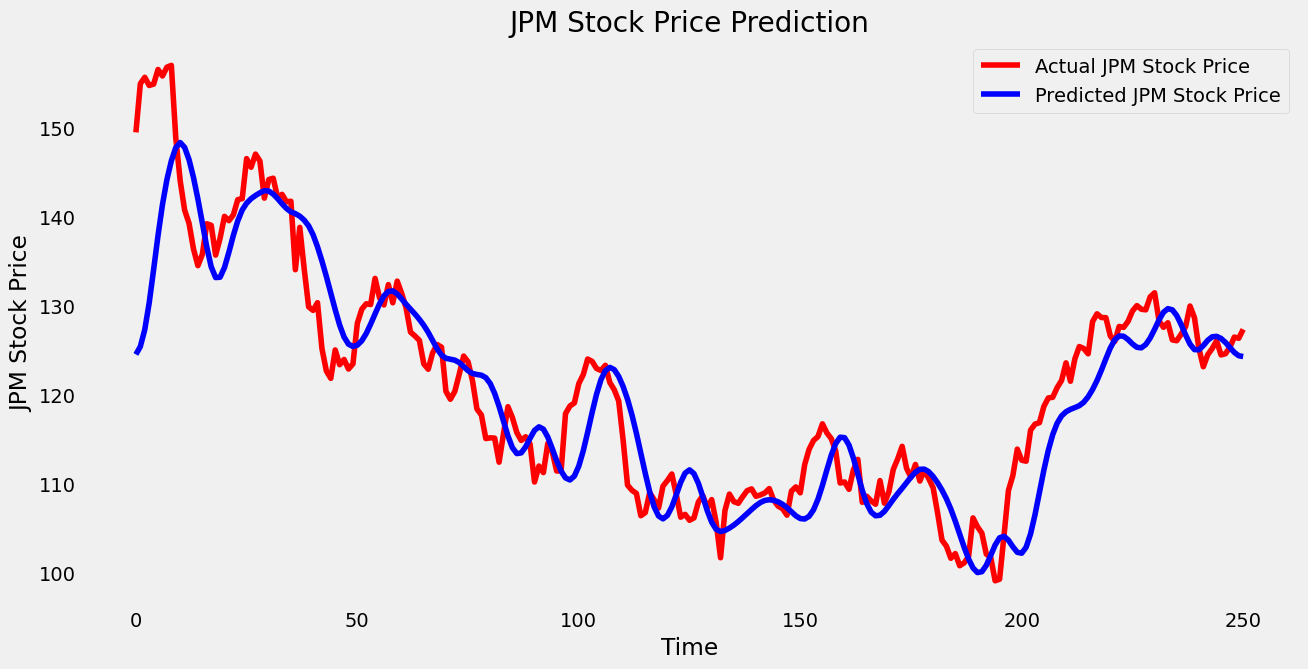

In [123]:
df_total = pd.concat((df["High"][:'2022'], df["High"]['2022':]), axis=0)
inputs = df_total[len(df_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = best_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(test_set, color='red', label='Actual JPM Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted JPM Stock Price')
plt.title('JPM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('JPM Stock Price')
plt.legend()
plt.grid()
plt.show()

In [125]:
# Evaluating our model
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The Root Mean Squared Error (RMSE) is: {}".format(rmse))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_set, predicted_stock_price)
print("The Mean Absolute Error (MAE) is: {}".format(mae))

The Root Mean Squared Error (RMSE) is: 5.926600251427346
The Mean Absolute Error (MAE) is: 4.101847457998142
